 ## <center>ENCRYPTIX_TASK 02</center>
 ### <center>MOVIE RATING PREDICTION USING PYTHON</center>

->Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.

->The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.

->Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

### Loading the dataset

In [2]:
# Load the dataset with specified encoding
data = pd.read_csv('IMDb_Movies_India.csv', encoding='latin1')  
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(data.head())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

### EDA

In [5]:
print(data.describe())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


## Data visualisation

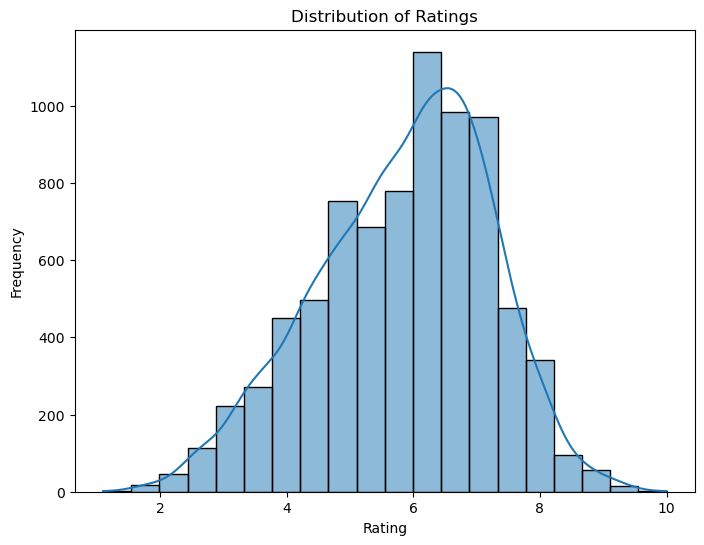

In [5]:
#Histogram of rating
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

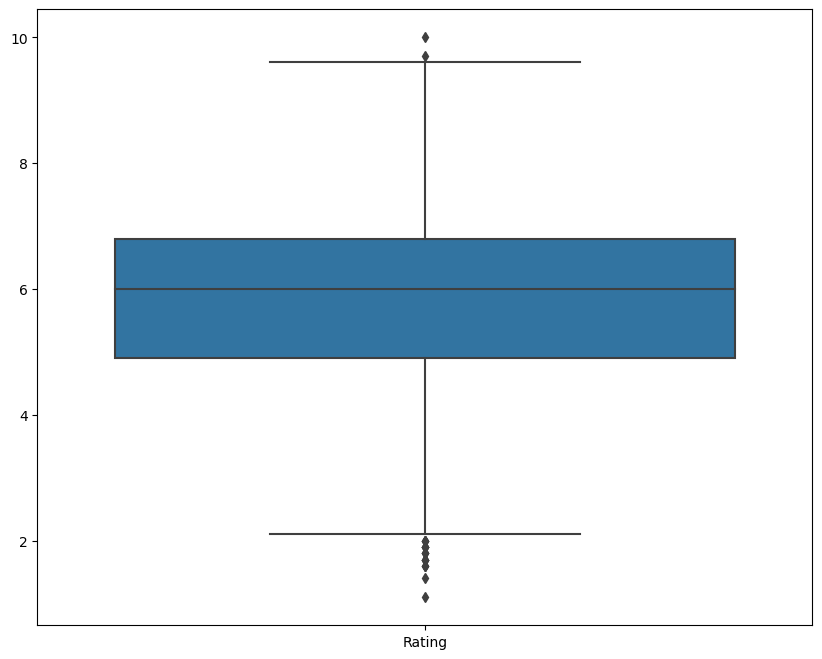

In [7]:

# Boxplot to identify outliers in the features
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.show()



## COUNTPLOT

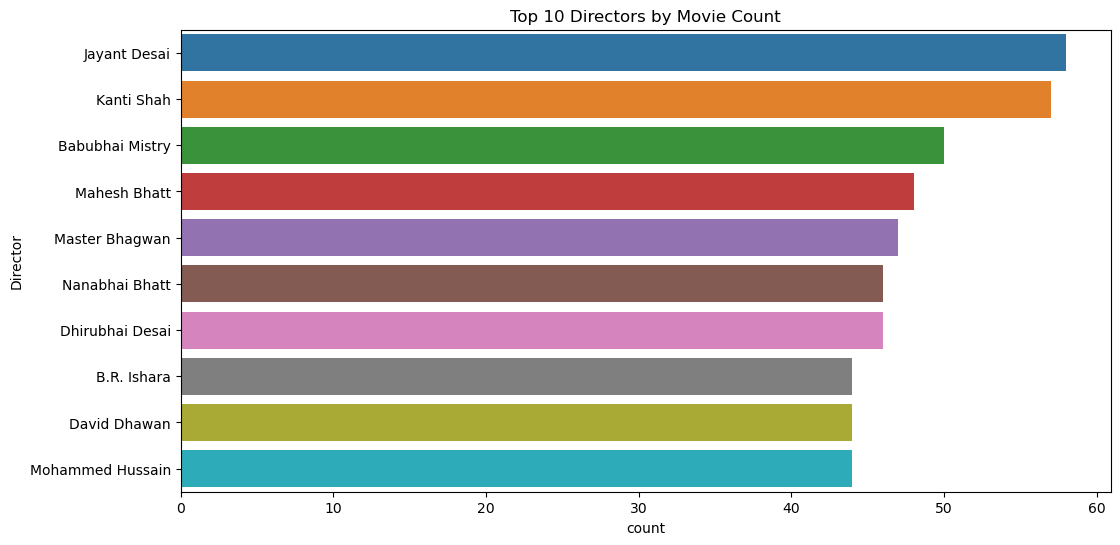

In [7]:

plt.figure(figsize=(12, 6))
sns.countplot(y='Director', data=data, order=data['Director'].value_counts().index[:10])
plt.title('Top 10 Directors by Movie Count')
plt.show()

## Feature Engineering

In [8]:
# Check for unexpected formats in 'Year' column
unexpected_values = data[~data['Year'].str.contains(r'^\d{4}$', na=False)]
print("Unexpected values in 'Year' column:")
print(unexpected_values['Year'])

# Extract Year from 'Year' column
def extract_year(year):
    try:
        return int(str(year).split('(')[1].split(')')[0])
    except (IndexError, ValueError):
        return np.nan

data['Release_Year'] = data['Year'].apply(extract_year)

# Drop rows with missing or invalid years
data.dropna(subset=['Release_Year'], inplace=True)


Unexpected values in 'Year' column:
0           NaN
1        (2019)
2        (2021)
3        (2019)
4        (2010)
          ...  
15504    (1988)
15505    (1999)
15506    (2005)
15507    (1988)
15508    (1998)
Name: Year, Length: 15509, dtype: object


In [9]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Genre_Encoded'] = label_encoder.fit_transform(data['Genre'])
data['Director_Encoded'] = label_encoder.fit_transform(data['Director'])
data['Actor1_Encoded'] = label_encoder.fit_transform(data['Actor 1'])
data['Actor2_Encoded'] = label_encoder.fit_transform(data['Actor 2'])
data['Actor3_Encoded'] = label_encoder.fit_transform(data['Actor 3'])


## Data Preprocessing

In [10]:
# Data Preprocessing
# Handle missing values (if any)
data.dropna(inplace=True)


In [11]:
# Convert 'Duration' column to numeric
data['Duration'] = data['Duration'].str.extract(r'(\d+)').astype(float)

# Drop rows with missing or invalid 'Duration' values
data.dropna(subset=['Duration'], inplace=True)



## DISTRIBUTION OF NUMERICAL FEATURES

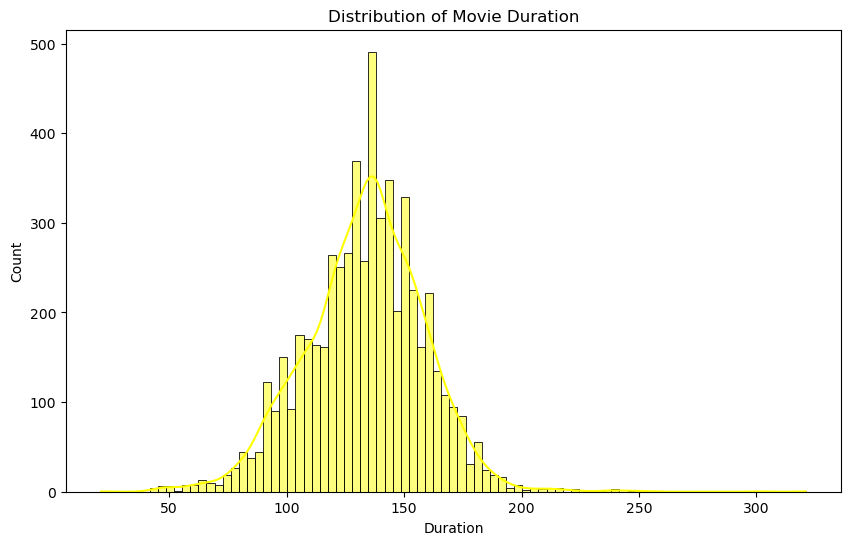

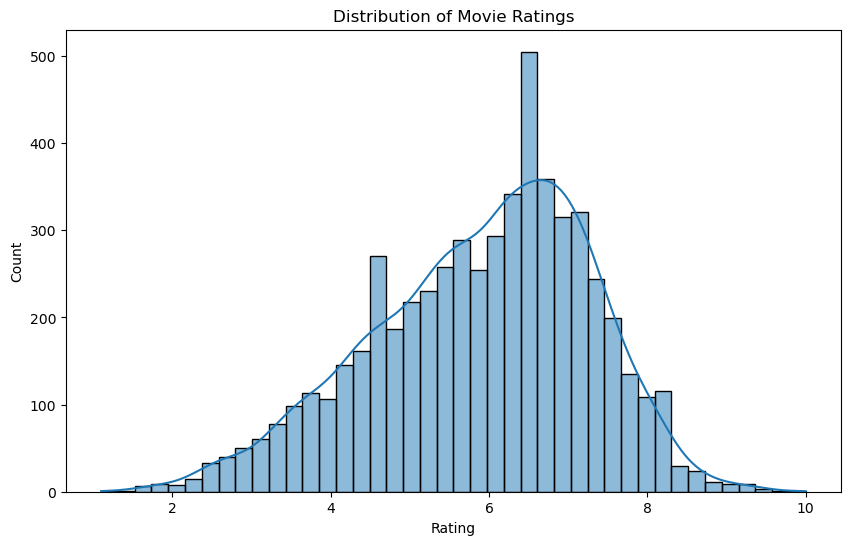

In [12]:

plt.figure(figsize=(10, 6))
sns.histplot(data['Duration'], kde=True,color="yellow")
plt.title('Distribution of Movie Duration')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], kde=True)
plt.title('Distribution of Movie Ratings')
plt.show()



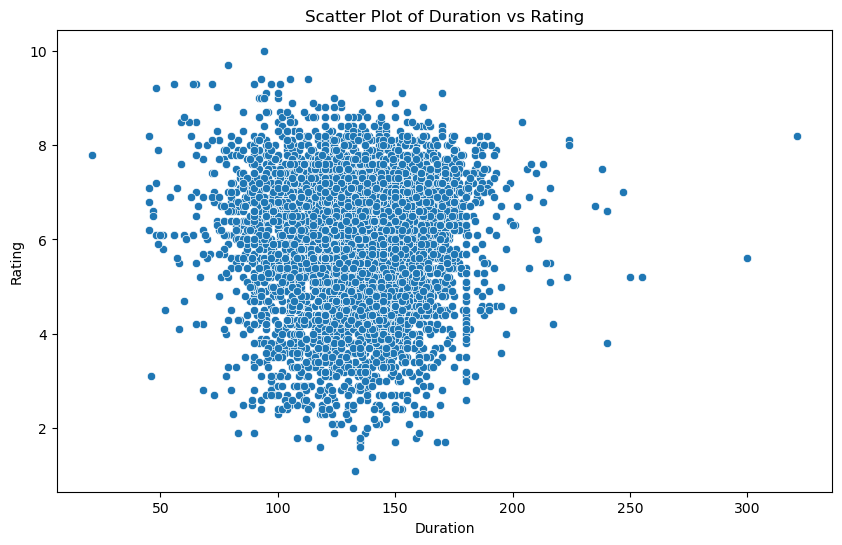

In [13]:
# Scatter plot for Duration vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Rating', data=data)
plt.title('Scatter Plot of Duration vs Rating')
plt.show()

## Splitting data

In [ ]:
# Select features and target variable
X = data[['Release_Year', 'Duration', 'Genre_Encoded', 'Director_Encoded', 'Actor1_Encoded', 'Actor2_Encoded', 'Actor3_Encoded']]
y = data['Rating']


In [58]:
X

,Release_Year,Duration,Genre_Encoded,Director_Encoded,Actor1_Encoded,Actor2_Encoded,Actor3_Encoded
1,2019.0,109.0,294,1475,3162,4606,510
3,2019.0,110.0,224,3170,2817,1447,3875
5,1997.0,147.0,193,3633,872,115,3690
6,2005.0,142.0,360,4759,1640,2275,4590
8,2012.0,82.0,407,286,4471,2394,1783
...,...,...,...,...,...,...,...
15493,2015.0,115.0,294,2879,4301,3621,2884
15494,2001.0,153.0,166,4797,1802,3285,2088
15503,1989.0,125.0,28,4224,963,1536,3026
15505,1999.0,129.0,39,2393,217,4359,503


In [59]:
y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
X_train, X_test, y_train, y_test 

(       Release_Year  Duration  Genre_Encoded  Director_Encoded  \
 9424         2016.0     143.0            294              1713   
 12009        1942.0     153.0            294              2765   
 4316         1989.0     147.0            346              2091   
 6897         1961.0     139.0            193              4947   
 2338         2012.0      74.0            294               680   
 ...             ...       ...            ...               ...   
 10263        1979.0     120.0            318              2683   
 14280        2010.0      75.0            353              4908   
 14355        2005.0      88.0            449              1036   
 14818        2018.0     135.0            177              4673   
 2209         2003.0      95.0            400              3532   
 
        Actor1_Encoded  Actor2_Encoded  Actor3_Encoded  
 9424             1708            4052            3364  
 12009             924            3826            3908  
 4316             3031 

## Model Building

In [62]:
# Initialize Linear Regression model
model_lr = LinearRegression()

In [63]:
# Fit the model to the training data
model_lr.fit(X_train, y_train)

LinearRegression()

In [65]:
# Make predictions on the test data
y_pred_lr = model_lr.predict(X_test)
y_pred_lr

array([5.7164368 , 5.85996377, 5.97937947, ..., 5.66921491, 5.65317606,
       6.48429492])

In [66]:
# Evaluate the model
print('Linear Regression Metrics:')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lr))
print('R-squared:', r2_score(y_test, y_pred_lr))


Linear Regression Metrics:
Mean Absolute Error: 1.0705984184196224
Mean Squared Error: 1.7550527671246894
R-squared: 0.05221612570860168


In [67]:
# Initialize Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [68]:

# Fit the model to the training data
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [70]:
# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test)
y_pred_rf

array([5.459, 6.544, 5.674, ..., 4.991, 4.831, 6.711])

In [71]:
# Evaluate the model
print('\nRandom Forest Regression Metrics:')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))
print('R-squared:', r2_score(y_test, y_pred_rf))


Random Forest Regression Metrics:
Mean Absolute Error: 0.9913542402826857
Mean Squared Error: 1.5974603436395758
R-squared: 0.13732100716147932


## Prediction for a new data point

In [72]:

# Example new data point (replace with actual values)
new_data_point = [[2000, 120, 3, 15, 120, 215, 350]]

# Make prediction for the new data point
predicted_rating = model_rf.predict(new_data_point)
print('\nPredicted Rating for New Data Point:', predicted_rating[0])


Predicted Rating for New Data Point: 4.185999999999996


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
